<a href="https://colab.research.google.com/github/poojaneuusa/Image-Processing-Projects/blob/main/Zero_Shot_Img_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install sentence_transformers

In [1]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch

!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

dog_names = list(glob.glob('/content/dog-cat-full-dataset/data/train/dogs/*jpg'))[:100]
cat_names = list(glob.glob('/content/dog-cat-full-dataset/data/train/cats/*jpg'))[:100]
img_names = dog_names + cat_names

from random import shuffle
shuffle(img_names)














Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25033, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 25033 (delta 0), reused 4 (delta 0), pack-reused 25027 (from 1)
Receiving objects: 100% (25033/25033), 541.85 MiB | 32.09 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (24990/24990), done.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

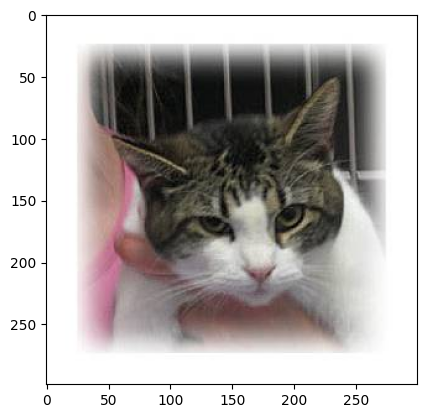

Predicted Label: cat
-----




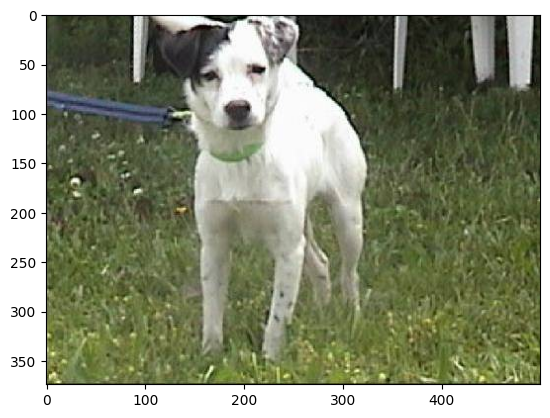

Predicted Label: dog
-----




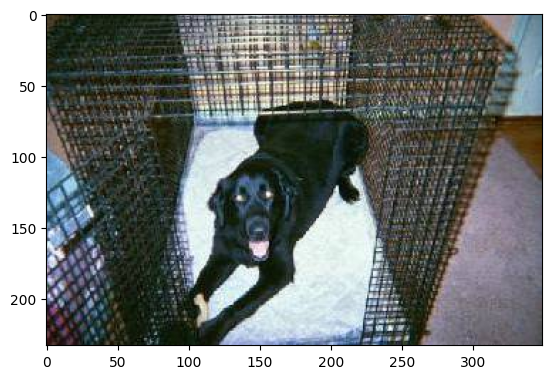

Predicted Label: dog
-----




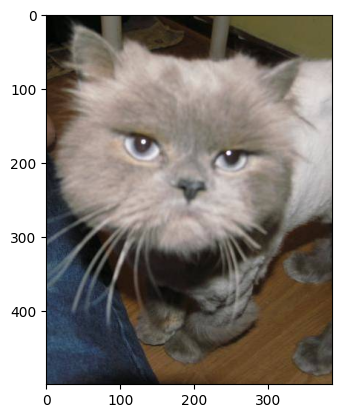

Predicted Label: cat
-----




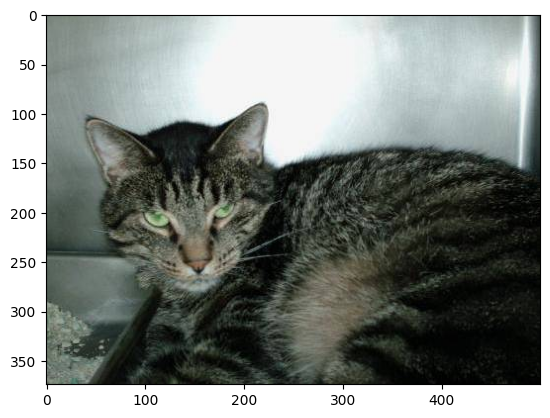

Predicted Label: cat
-----




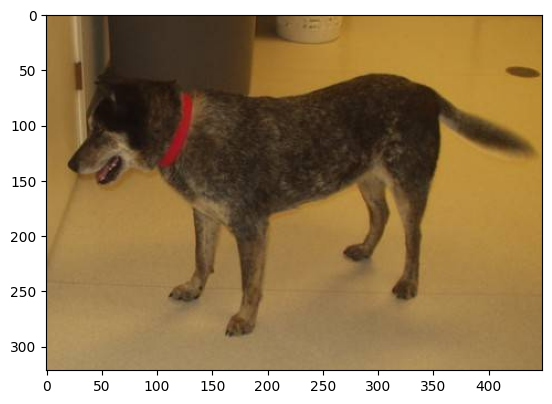

Predicted Label: dog
-----




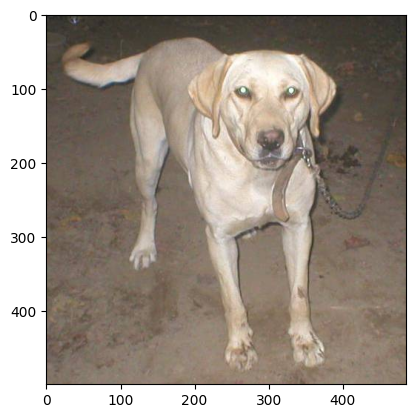

Predicted Label: dog
-----




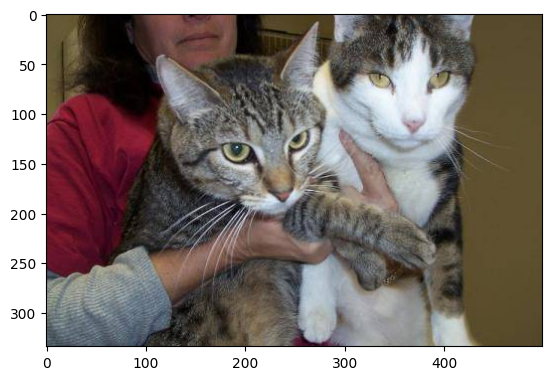

Predicted Label: cat
-----




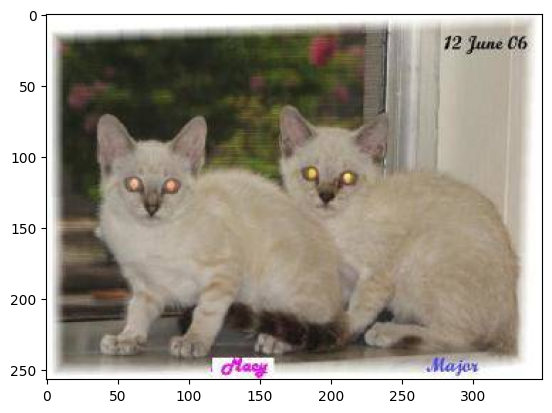

Predicted Label: cat
-----




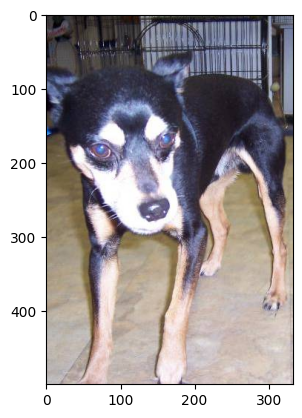

Predicted Label: dog
-----




In [2]:
model = SentenceTransformer('clip-ViT-B-32')
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True)

labels = ['dog', 'cat']

label_embed = model.encode(labels, convert_to_tensor=True)
cos_scores = util.cos_sim(img_embed, label_embed)

pred_labels = torch.argmax(cos_scores, dim=1)

for img_name, pred_label in zip(img_names[10:20], pred_labels[10:20]):
  im = Image.open(img_name)
  plt.figure()
  plt.imshow(im)
  plt.show()
  print("Predicted Label:", labels[pred_label])
  print("-----\n\n")

